 # Cross-Country Comparison

#### Preparing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Data Loading & Preprocessing

In [5]:
# Load cleaned datasets
countries = ['benin','sierralione','togo']
dfs = {c: pd.read_csv(f'C:/Users/user/Desktop/solar-challenge-week1/data/{c}_clean.csv', parse_dates=['Timestamp']) for c in countries}

# Combine with country labels
for c, df in dfs.items():
    df['Country'] = c.title()  # Add country column
combined = pd.concat(dfs.values())

#### Boxplots (Metric comparission)

C:\Users\user\AppData\Local\Temp\ipykernel_14388\3399220172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Country', y=metric, ax=axes[i], palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_14388\3399220172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Country', y=metric, ax=axes[i], palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_14388\3399220172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Country', y=metric, ax=axes[i], palette='viridis')


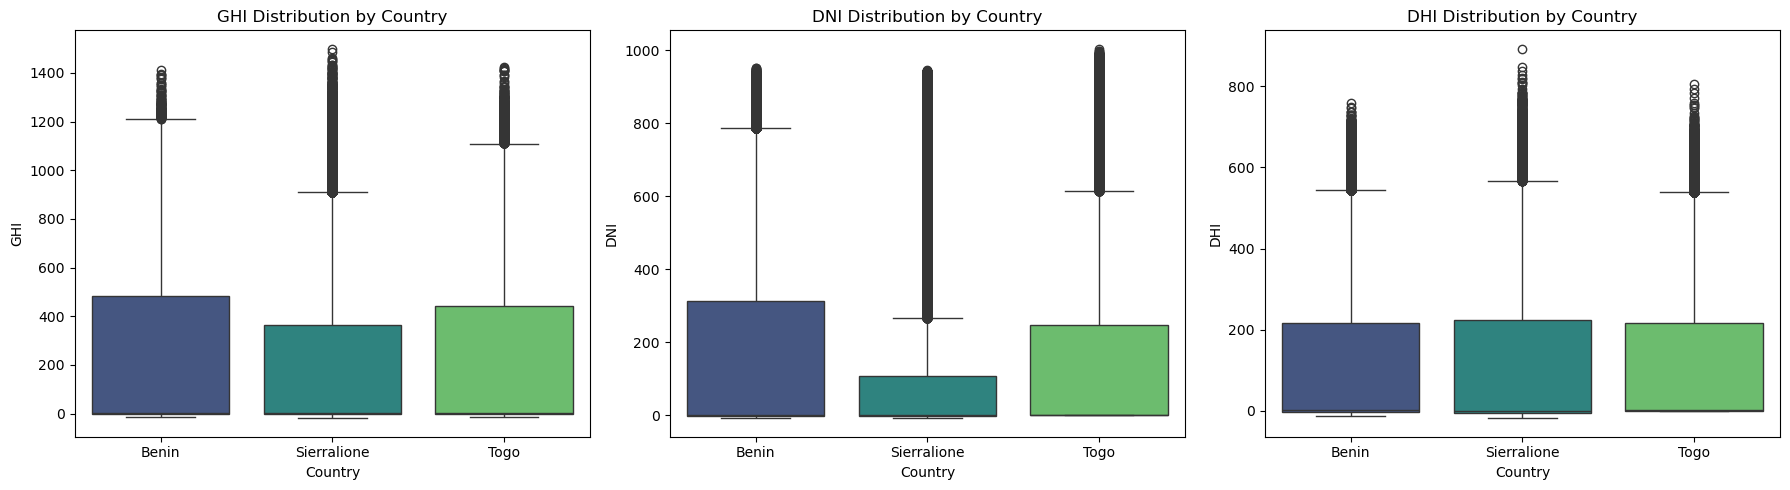

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['GHI', 'DNI', 'DHI']

for i, metric in enumerate(metrics):
    sns.boxplot(data=combined, x='Country', y=metric, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric} Distribution by Country')
plt.tight_layout()
plt.show()

#### Summary Table

In [8]:
summary = combined.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
display(summary)

GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierralione  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo         230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                    DHI                     
                   mean median         std  
Country                                     
Benin        115.358961    1.6  158.691074  
Sierralione  113.720571   -0.1  158.946032  
Togo         116.444352    2.5  156.520714

#### ANOVA for GHI (Statistical Testing)

In [9]:
from scipy.stats import f_oneway

groups = [df['GHI'].dropna() for df in dfs.values()]
f_val, p_val = f_oneway(*groups)
print(f"ANOVA p-value for GHI differences: {p_val:.4f}")

ANOVA p-value for GHI differences: 0.0000


**Key Findings:**
1. Togo shows the highest median GHI 2.8 W/m² but with high variability σ=322
2. Sierra Leone has the most stable DNI values σ=218
3. Benin has less stable GHI, DNI and DHI values.

#### bar chart (Visual Summary)

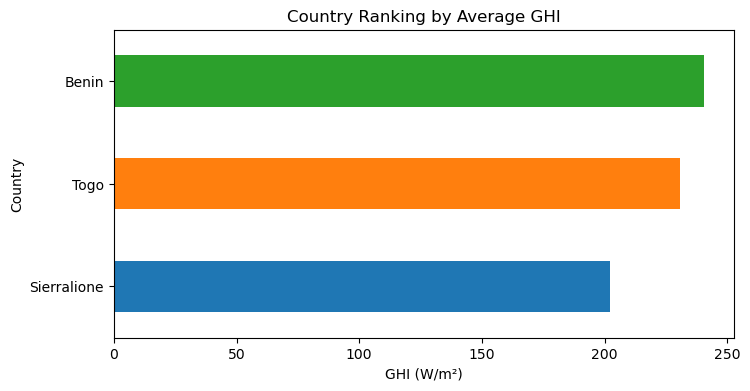

In [10]:
# Ranking by average GHI
plt.figure(figsize=(8,4))
combined.groupby('Country')['GHI'].mean().sort_values().plot(
    kind='barh', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)
plt.title('Country Ranking by Average GHI')
plt.xlabel('GHI (W/m²)')
plt.show()